In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
import math
import seaborn as sns

pd.set_option("future.no_silent_downcasting", True)
pd.set_option('display.max_columns', 50)  
pd.set_option('display.max_rows', 50)  

In [47]:
def load_data(file_path, target_column):
    """
    Load data for TSV files.
    
    Args:
    - file_path (str): Path to the TSV file.
    - target_column (str): The column to be used as the target for the model.
    
    Returns:
    - X, y 
    """
    # Load the data from the CSV file
    data = pd.read_csv(file_path, sep='\t')
    
    # Check for missing values (optional step)
    # data = data.dropna()
    
    # Split features (X) and target (y)
    X = data.drop(columns=[target_column])
    y = data[target_column]
    return X, y

In [48]:
rents_file_path = '../output/rents/output.csv'
rents_X, rents_y = load_data(rents_file_path, 'price')
rents_X = rents_X.drop(columns=['tenantGender', 'newDevelopmentFinished', 'garageType', 'isSmokingAllowed', 'externalReference', 'thumbnail','topNewDevelopment', 'superTopHighlight', 'hasStaging'])
rents_X

,address,bathrooms,country,distance,district,hasVideo,latitude,longitude,municipality,neighborhood,numPhotos,operation,propertyCode,province,rooms,priceByArea,detailedType,size,url,status,propertyType,suggestedTexts,showAddress,newDevelopment,hasPlan,has3DTour,has360,description,exterior,floor,hasLift,created
0,calle de Tarragona,2,es,1648,Arganzuela,False,40.402064,-3.697186,Madrid,Palos de la Frontera,23,rent,106205112,Madrid,2,13.0,{'typology': 'flat'},75.0,https://www.idealista.com/inmueble/106205112/,good,flat,"{'subtitle': 'Palos de la Frontera, Madrid', '...",False,False,False,False,False,Descubre este acogedor piso de 75 m2 ubicado e...,True,2,True,2024-10-08 17:52:00.177426
1,"calle de Pelayo, 59",1,es,961,Centro,False,40.424953,-3.697004,Madrid,Chueca-Justicia,13,rent,101319801,Madrid,0,19.0,"{'typology': 'flat', 'subTypology': 'studio'}",45.0,https://www.idealista.com/inmueble/101319801/,good,studio,"{'subtitle': 'Chueca-Justicia, Madrid', 'title...",True,False,False,False,False,"Para más viviendas como está, visita nuestra p...",False,4,True,2024-10-08 17:52:00.182339
2,calle de Alcántara,1,es,2745,Barrio de Salamanca,False,40.429930,-3.672965,Madrid,Lista,14,rent,103265138,Madrid,1,26.0,{'typology': 'flat'},46.0,https://www.idealista.com/inmueble/103265138/,good,flat,"{'subtitle': 'Lista, Madrid', 'title': 'Piso e...",False,False,False,False,False,DISPONIBLE EN ENERO 2025 - CONTRATO TEMPORAL p...,False,1,True,2024-10-08 18:44:38.777702
3,calle de Treviño,1,es,3369,Chamberí,True,40.446859,-3.704064,Madrid,Nuevos Ministerios-Ríos Rosas,27,rent,106204986,Madrid,1,31.0,{'typology': 'flat'},39.0,https://www.idealista.com/inmueble/106204986/,good,flat,"{'subtitle': 'Nuevos Ministerios-Ríos Rosas, M...",False,False,True,False,False,¡Bienvenido a tu nuevo hogar en Chamberí! Expl...,False,5,True,2024-10-08 18:44:38.777850
4,calle de Almadén,1,es,675,Centro,False,40.411566,-3.696059,Madrid,Huertas-Cortes,21,rent,106193108,Madrid,2,26.0,{'typology': 'flat'},50.0,https://www.idealista.com/inmueble/106193108/,good,flat,"{'subtitle': 'Huertas-Cortes, Madrid', 'title'...",False,False,False,False,False,¡Descubre tu nuevo hogar en el corazón del emb...,True,1,False,2024-10-08 18:44:38.778482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,barrio Pueblo Nuevo,1,es,6120,Ciudad Lineal,False,40.427266,-3.629388,Madrid,Pueblo Nuevo,6,rent,106250405,Madrid,3,23.0,{'typology': 'flat'},66.0,https://www.idealista.com/inmueble/106250405/,good,flat,"{'subtitle': 'Pueblo Nuevo, Madrid', 'title': ...",False,False,False,False,False,"Piso exterior, amueblado, luminoso, de 3 dormi...",True,8,True,2024-10-18 12:44:22.855892
1969,"SAN BARTOLOME, 9",1,es,584,Centro,False,40.421778,-3.698596,Madrid,Chueca-Justicia,9,rent,101211213,Madrid,0,19.0,"{'typology': 'flat', 'subTypology': 'studio'}",42.0,https://www.idealista.com/inmueble/101211213/,good,studio,"{'subtitle': 'Chueca-Justicia, Madrid', 'title...",True,False,False,False,True,"Se alquila estudio en pleno centro de Madrid, ...",False,1,True,2024-10-18 12:44:22.855958
1970,barrio Puerta del Ángel,1,es,2470,Latina,False,40.414458,-3.729378,Madrid,Puerta del Ángel,7,rent,106257550,Madrid,2,28.0,{'typology': 'flat'},36.0,https://www.idealista.com/inmueble/106257550/,good,flat,"{'subtitle': 'Puerta del Ángel, Madrid', 'titl...",False,False,False,False,False,"Piso de 2 dormitorios, salón con cocina americ...",True,2,False,2024-10-18 12:44:22.856026
1971,calle del Desengaño,1,es,566,Centro,False,40.419818,-3.705632,Madrid,Malasaña-Universidad,5,rent,106184518,Madrid,0,32.0,"{'typology': 'flat', 'subTypology': 'studio'}",36.0,https://www.idealista.com/inmueble/106184518/,good,studio,"{'subtitle': 'Malasaña-Universidad, Madrid', '...",False,False,False,False,False,¿Buscas un rinconcito luminoso y bien conectad...,True,1,True,2024-10-18 12:44:22.856093


In [49]:
sales_file_path = '../output/sales/output.csv'
sales_X, sales_y = load_data(sales_file_path, 'price')
sales_X = sales_X.drop(columns=['tenantGender', 'newDevelopmentFinished', 'garageType', 'isSmokingAllowed', 'externalReference', 'thumbnail', 'topNewDevelopment', 'superTopHighlight', 'hasStaging'])
sales_X

,address,bathrooms,country,distance,district,hasVideo,latitude,longitude,municipality,neighborhood,numPhotos,operation,propertyCode,province,rooms,priceByArea,detailedType,size,url,status,propertyType,suggestedTexts,showAddress,newDevelopment,hasPlan,has3DTour,has360,description,exterior,floor,hasLift,created
0,barrio Malasaña-Universidad,1,es,1209,Centro,False,40.425749,-3.708247,Madrid,Malasaña-Universidad,6,sale,106159216,Madrid,1,6875.0,{'typology': 'flat'},40.0,https://www.idealista.com/inmueble/106159216/,good,flat,"{'subtitle': 'Malasaña-Universidad, Madrid', '...",False,False,False,False,False,La Inmobiliaria Internacional CPM gestiona est...,False,2,False,2024-10-08 18:44:38.431657
1,calle de Juan Tornero,1,es,2480,Latina,False,40.410385,-3.728450,Madrid,Puerta del Ángel,23,sale,106205384,Madrid,3,3621.0,{'typology': 'flat'},66.0,https://www.idealista.com/inmueble/106205384/,good,flat,"{'subtitle': 'Puerta del Ángel, Madrid', 'titl...",False,False,True,False,False,¡Descubre tu nuevo hogar en el corazón de Madr...,True,4,True,2024-10-08 18:44:38.432450
2,calle de Arganzuela,2,es,1176,Centro,True,40.409503,-3.710546,Madrid,Lavapiés-Embajadores,32,sale,105960153,Madrid,2,5540.0,{'typology': 'flat'},63.0,https://www.idealista.com/inmueble/105960153/,good,flat,"{'subtitle': 'Lavapiés-Embajadores, Madrid', '...",False,False,True,True,False,Descubre esta espectacular vivienda recién ref...,False,1,True,2024-10-10 12:28:59.029327
3,calle de Emilio Carrere,1,es,1678,Chamberí,False,40.430535,-3.708256,Madrid,Arapiles,33,sale,106057681,Madrid,1,5763.0,{'typology': 'flat'},59.0,https://www.idealista.com/inmueble/106057681/,renew,flat,"{'subtitle': 'Arapiles, Madrid', 'title': 'Pis...",False,False,True,True,False,Fantástico apartamento luminoso a patio de man...,False,1,True,2024-10-10 12:28:59.029453
4,calle de la Ballesta,1,es,708,Centro,True,40.422297,-3.704335,Madrid,Malasaña-Universidad,22,sale,106144167,Madrid,1,7865.0,{'typology': 'flat'},37.0,https://www.idealista.com/inmueble/106144167/,good,flat,"{'subtitle': 'Malasaña-Universidad, Madrid', '...",False,False,True,False,True,GLOBALPISO MALASAÑA VENDE fantástica vivienda ...,False,1,False,2024-10-10 12:28:59.029566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,barrio Orcasitas,1,es,5628,Usera,False,40.366750,-3.711176,Madrid,Orcasitas,16,sale,106245731,Madrid,2,3238.0,{'typology': 'flat'},80.0,https://www.idealista.com/inmueble/106245731/,good,flat,"{'subtitle': 'Orcasitas, Madrid', 'title': 'Pi...",False,False,False,False,False,¿Te gustaría solicitar una visita presencial o...,True,3,True,2024-10-18 12:44:18.659834
2024,barrio Lucero,1,es,4378,Latina,False,40.403280,-3.748966,Madrid,Lucero,7,sale,106257118,Madrid,2,2295.0,{'typology': 'flat'},78.0,https://www.idealista.com/inmueble/106257118/,renew,flat,"{'subtitle': 'Lucero, Madrid', 'title': 'Piso'}",False,False,False,False,False,ideal iversores alta rentabilida.,True,1,True,2024-10-18 12:44:18.659923
2025,paseo de las Delicias,1,es,1176,Arganzuela,False,40.406937,-3.694958,Madrid,Palos de la Frontera,0,sale,106289448,Madrid,1,5421.0,{'typology': 'flat'},38.0,https://www.idealista.com/inmueble/106289448/,good,flat,"{'subtitle': 'Palos de la Frontera, Madrid', '...",False,False,False,False,False,apartamento en el paseo de las delicias junto ...,False,1,True,2024-10-18 12:44:18.660011
2026,calle de Ezequiel Solana,1,es,4884,Ciudad Lineal,False,40.431914,-3.646216,Madrid,Pueblo Nuevo,0,sale,106251634,Madrid,3,2722.0,{'typology': 'flat'},90.0,https://www.idealista.com/inmueble/106251634/,good,flat,"{'subtitle': 'Pueblo Nuevo, Madrid', 'title': ...",False,False,False,False,False,Agencia inmobiliaria de Madrid | Zona Ciudad L...,False,bj,False,2024-10-18 12:44:18.660084


In [50]:
sales_X['status'].value_counts()

status
good              1628
renew              337
newdevelopment      56
unknown              7
Name: count, dtype: int64

In [51]:
sales_X.isnull().sum()

address             0
bathrooms           0
country             0
distance            0
district            0
hasVideo            0
latitude            0
longitude           0
municipality        0
neighborhood        0
numPhotos           0
operation           0
propertyCode        0
province            0
rooms               0
priceByArea         0
detailedType        0
size                0
url                 0
status              0
propertyType        0
suggestedTexts      0
showAddress         0
newDevelopment      0
hasPlan             0
has3DTour           0
has360              0
description         7
exterior            0
floor             118
hasLift            32
created             0
dtype: int64

In [52]:
rents_X.isnull().sum()

address            0
bathrooms          0
country            0
distance           0
district           0
hasVideo           0
latitude           0
longitude          0
municipality       0
neighborhood       0
numPhotos          0
operation          0
propertyCode       0
province           0
rooms              0
priceByArea        0
detailedType       0
size               0
url                0
status             0
propertyType       0
suggestedTexts     0
showAddress        0
newDevelopment     0
hasPlan            0
has3DTour          0
has360             0
description        4
exterior           0
floor             92
hasLift           12
created            0
dtype: int64

In [53]:
def transform_hasLift(df):
    df.loc[((df['propertyType'] == 'flat') | (df['propertyType'] == 'penthouse') | (df['propertyType'] == 'studio')) & (df['hasLift'].isna()), 'hasLift'] = False
    return df

def transformed_floor(df):
    df.loc[((df['propertyType'] == 'flat') | (df['propertyType'] == 'penthouse') | (df['propertyType'] == 'studio')) & (df['floor'].isna()), 'floor'] = '-1'
    return df

def add_bare_title(df):
    df['bare_tittle'] = df['description'].fillna('').str.contains('nuda', case=False).astype(int)
    return df

def index_bare_title_positives(df):
    return df.index[df['bare_tittle'] == 1].tolist()

def index_bassement_possitives(df):
    return df.index[df['isBassement'] == 1].tolist()

def add_is_bassement(df):
    df['isBassement'] = df['floor'].fillna('None').isin(['bj', 'ss', 'st', '-1', '-2', 'en']).astype(int)
    return df

rents_X = transform_hasLift(rents_X)
rents_X = transformed_floor(rents_X)
rents_X = add_is_bassement(rents_X)
sales_X = transform_hasLift(sales_X)
sales_X = transformed_floor(sales_X)
sales_X = add_bare_title(sales_X)
sales_X = add_is_bassement(sales_X)
bare_title_index = index_bare_title_positives(sales_X)
sales_X = sales_X.drop(bare_title_index, axis=0)
sales_y = sales_y.drop(bare_title_index, axis=0)
#bassement_index = index_bassement_possitives(sales_X)
#sales_X = sales_X.drop(bassement_index, axis=0)
#sales_y = sales_y.drop(bassement_index, axis=0)

In [54]:
sales_X.isnull().sum() 

address            0
bathrooms          0
country            0
distance           0
district           0
hasVideo           0
latitude           0
longitude          0
municipality       0
neighborhood       0
numPhotos          0
operation          0
propertyCode       0
province           0
rooms              0
priceByArea        0
detailedType       0
size               0
url                0
status             0
propertyType       0
suggestedTexts     0
showAddress        0
newDevelopment     0
hasPlan            0
has3DTour          0
has360             0
description        7
exterior           0
floor             28
hasLift           27
created            0
bare_tittle        0
isBassement        0
dtype: int64

In [55]:
rents_X.isnull().sum()

address           0
bathrooms         0
country           0
distance          0
district          0
hasVideo          0
latitude          0
longitude         0
municipality      0
neighborhood      0
numPhotos         0
operation         0
propertyCode      0
province          0
rooms             0
priceByArea       0
detailedType      0
size              0
url               0
status            0
propertyType      0
suggestedTexts    0
showAddress       0
newDevelopment    0
hasPlan           0
has3DTour         0
has360            0
description       4
exterior          0
floor             6
hasLift           6
created           0
isBassement       0
dtype: int64

In [56]:
sales_X[sales_X.isna().any(axis=1)]

,address,bathrooms,country,distance,district,hasVideo,latitude,longitude,municipality,neighborhood,numPhotos,operation,propertyCode,province,rooms,priceByArea,detailedType,size,url,status,propertyType,suggestedTexts,showAddress,newDevelopment,hasPlan,has3DTour,has360,description,exterior,floor,hasLift,created,bare_tittle,isBassement
26,calle de Salvador Martínez,2,es,5693,Usera,False,40.365540,-3.697273,Madrid,12 de Octubre-Orcasur,33,sale,105570267,Madrid,3,2184.0,"{'typology': 'chalet', 'subTypology': 'terrace...",114.0,https://www.idealista.com/inmueble/105570267/,good,chalet,"{'subtitle': '12 de Octubre-Orcasur, Madrid', ...",False,False,True,True,False,CONTACTAR CON LA EXTENSIÓN Nº1 No cobramos al ...,False,NaN,NaN,2024-10-10 12:28:59.033021,0,0
35,calle de la Sierra de la Solana,2,es,4107,Puente de Vallecas,False,40.388150,-3.669544,Madrid,San Diego,30,sale,106006987,Madrid,3,2701.0,"{'typology': 'chalet', 'subTypology': 'terrace...",107.0,https://www.idealista.com/inmueble/106006987/,good,chalet,"{'subtitle': 'San Diego, Madrid', 'title': 'Ch...",False,False,True,True,False,MARCAR LA EXTENSIÓN Nº 3 ¡No cobramos al compr...,False,NaN,NaN,2024-10-10 12:28:59.034006,0,0
90,barrio Colina,1,es,5948,Ciudad Lineal,True,40.461174,-3.661306,Madrid,Colina,35,sale,105937686,Madrid,1,5896.0,"{'typology': 'chalet', 'subTypology': 'indepen...",67.0,https://www.idealista.com/inmueble/105937686/,good,chalet,"{'subtitle': 'Colina, Madrid', 'title': 'Casa ...",False,False,True,False,True,Suma inmobiliaria presenta en EXCLUSIVA casa i...,False,NaN,NaN,2024-10-10 12:28:59.457652,0,0
108,calle de Cestona,3,es,5221,Usera,False,40.371221,-3.715781,Madrid,Orcasitas,32,sale,106042137,Madrid,3,3947.0,{'typology': 'chalet'},95.0,https://www.idealista.com/inmueble/106042137/,good,chalet,"{'subtitle': 'Orcasitas, Madrid', 'title': 'Ch...",False,False,True,False,True,Housfy vende precioso Chalet adosado con refor...,False,NaN,NaN,2024-10-10 12:28:59.928162,0,0
126,calle de Alonso Núñez,1,es,4619,Tetuán,True,40.457376,-3.711396,Madrid,Berruguete,31,sale,106032469,Madrid,1,4975.0,"{'typology': 'chalet', 'subTypology': 'indepen...",40.0,https://www.idealista.com/inmueble/106032469/,good,chalet,"{'subtitle': 'Berruguete, Madrid', 'title': 'C...",False,False,True,False,True,¡Descubre tu nuevo hogar en el corazón de la c...,False,NaN,NaN,2024-10-10 12:29:00.610984,0,0
242,calle de Egipto,2,es,6455,San Blas,False,40.433336,-3.627285,Madrid,Simancas,47,sale,106163287,Madrid,2,3343.0,{'typology': 'chalet'},70.0,https://www.idealista.com/inmueble/106163287/,good,chalet,"{'subtitle': 'Simancas, Madrid', 'title': 'Cha...",False,False,True,False,False,Preciosa casa a la venta en el barrio de Siman...,False,NaN,NaN,2024-10-10 12:29:01.613768,0,0
378,calle de San Magín,1,es,3883,Usera,False,40.384217,-3.717223,Madrid,Zofío,21,sale,105960943,Madrid,3,3014.0,{'typology': 'flat'},73.0,https://www.idealista.com/inmueble/105960943/,good,flat,"{'subtitle': 'Zofío, Madrid', 'title': 'Piso e...",False,False,False,False,False,NaN,True,1,True,2024-10-10 12:29:02.889786,0,0
413,calle de Pelayo,1,es,924,Centro,False,40.424508,-3.696634,Madrid,Chueca-Justicia,21,sale,106127183,Madrid,1,5829.0,{'typology': 'flat'},41.0,https://www.idealista.com/inmueble/106127183/,renew,flat,"{'subtitle': 'Chueca-Justicia, Madrid', 'title...",False,False,False,False,False,NaN,False,3,False,2024-10-10 12:29:03.305885,0,0
425,barrio Valdeacederas,2,es,5823,Tetuán,False,40.469048,-3.701823,Madrid,Valdeacederas,61,sale,106068317,Madrid,4,3455.0,{'typology': 'flat'},110.0,https://www.idealista.com/inmueble/106068317/,good,flat,"{'subtitle': 'Valdeacederas, Madrid', 'title':...",False,False,False,False,False,NaN,True,2,False,2024-10-10 12:29:03.306995,0,0
515,barrio Entrevías,1,es,4647,Puente de Vallecas,False,40.380736,-3.672359,Madrid,Entrevías,21,sale,106143113,Madrid,2,2826.0,"{'typology': 'chalet', 'subTypology': 'terrace...",69.0,https://www.idealista.com/inmueble/106143113/,good,chalet,"{'subt

In [57]:
rents_X[rents_X.isna().any(axis=1)]

,address,bathrooms,country,distance,district,hasVideo,latitude,longitude,municipality,neighborhood,numPhotos,operation,propertyCode,province,rooms,priceByArea,detailedType,size,url,status,propertyType,suggestedTexts,showAddress,newDevelopment,hasPlan,has3DTour,has360,description,exterior,floor,hasLift,created,isBassement
164,calle Rochapea,1,es,5259,Usera,False,40.370112,-3.689496,Madrid,San Fermín,21,rent,106158854,Madrid,2,20.0,"{'typology': 'chalet', 'subTypology': 'terrace...",70.0,https://www.idealista.com/inmueble/106158854/,good,chalet,"{'subtitle': 'San Fermín, Madrid', 'title': 'C...",False,False,False,False,False,SERVICHECK ALQUILA INCREIBLE CHALET Esta es un...,False,NaN,NaN,2024-10-10 12:29:12.805106,0
366,"calle Taconera, 69",1,es,5201,Usera,False,40.370391,-3.691524,Madrid,San Fermín,27,rent,106197819,Madrid,3,17.0,"{'typology': 'chalet', 'subTypology': 'indepen...",71.0,https://www.idealista.com/inmueble/106197819/,good,chalet,"{'subtitle': 'San Fermín, Madrid', 'title': 'C...",True,False,False,False,False,Vivienda unifamiliar REFORMADA A ESTRENAR de 7...,False,NaN,NaN,2024-10-10 12:29:14.321347,0
601,calle Rafaela Pascual,1,es,5460,Moncloa,False,40.462754,-3.722710,Madrid,Ciudad Universitaria,36,rent,105957846,Madrid,2,39.0,{'typology': 'chalet'},40.0,https://www.idealista.com/inmueble/105957846/,good,chalet,"{'subtitle': 'Ciudad Universitaria, Madrid', '...",False,False,False,False,False,RESERVAS E INQUIETUDES Para obtener informació...,False,NaN,NaN,2024-10-10 12:29:15.946025,0
615,barrio Arcos,2,es,7479,San Blas,False,40.427217,-3.613068,Madrid,Arcos,17,rent,106177541,Madrid,3,14.0,"{'typology': 'chalet', 'subTypology': 'terrace...",90.0,https://www.idealista.com/inmueble/106177541/,good,chalet,"{'subtitle': 'Arcos, Madrid', 'title': 'Chalet...",False,False,False,False,False,Donpiso alquila en exclusiva espectacular casa...,False,NaN,NaN,2024-10-10 12:29:16.271258,0
784,calle de Narváez,2,es,2005,Barrio de Salamanca,False,40.421919,-3.677675,Madrid,Goya,32,rent,106115782,Madrid,2,35.0,"{'typology': 'chalet', 'subTypology': 'indepen...",55.0,https://www.idealista.com/inmueble/106115782/,good,chalet,"{'subtitle': 'Goya, Madrid', 'title': 'Casa in...",False,False,True,False,False,DÚPLEX RECIÉN REFORMADO A ESTRENAR Vivienda in...,False,NaN,NaN,2024-10-10 12:29:17.596564,0
838,"calle Taconera, 69",1,es,5201,Usera,True,40.370391,-3.691524,Madrid,San Fermín,27,rent,106103166,Madrid,3,17.0,"{'typology': 'chalet', 'subTypology': 'indepen...",71.0,https://www.idealista.com/inmueble/106103166/,good,chalet,"{'subtitle': 'San Fermín, Madrid', 'title': 'C...",True,False,False,False,False,Vivienda unifamiliar REFORMADA A ESTRENAR de 7...,False,NaN,NaN,2024-10-10 12:29:18.344492,0
1013,calle de Donoso Cortés,1,es,2473,Chamberí,False,40.437691,-3.710002,Madrid,Arapiles,24,rent,106163752,Madrid,2,26.0,{'typology': 'flat'},72.0,https://www.idealista.com/inmueble/106163752/,good,flat,"{'subtitle': 'Arapiles, Madrid', 'title': 'Pis...",False,False,True,False,False,NaN,True,6,True,2024-10-10 12:29:19.562563,0
1529,calle de Seco,2,es,3226,Retiro,True,40.397218,-3.672085,Madrid,Adelfas,30,rent,106288355,Madrid,2,18.0,{'typology': 'flat'},70.0,https://www.idealista.com/inmueble/106288355/,good,flat,"{'subtitle': 'Adelfas, Madrid', 'title': 'Piso...",False,False,False,False,False,NaN,True,7,True,2024-10-18 12:44:19.585057,0
1596,barrio Pacífico,1,es,2728,Retiro,False,40.403995,-3.672766,Madrid,Pacífico,27,rent,106280628,Madrid,1,19.0,{'typology': 'flat'},67.0,https://www.idealista.com/inmueble/106280628/,good,flat,"{'subtitle': 'Pacífico, Madrid', 'title': 'Piso'}",False,False,False,False,False,NaN,True,-1,True,2024-10-18 12:44:20.248038,1
1716,barrio Cuatro Caminos,1,es,3431,Tetuán,False,40.447543,-3.701117,Madrid,Cuatro Caminos,9,rent,106250877,Madrid,1,28.0,{'typology': 'flat'},43.0,https://www.idealista.com/inmueble/106250877/,good,flat,"{'subtitle': 'Cuatro Caminos, Madrid', 'title'...",False,False,False,False,False,NaN,True,bj,

In [58]:
class MapFloorValues(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # Nothing to fit here
    
    def get_feature_names_out(self, input_features=None):
        return input_features
    
    def _map_values(self, x):
        if isinstance(x, str) and x.isdigit():
            return int(x) 
        if pd.isna(x):
            return np.nan
        match x: 
            case 'bj':
                return -1
            case 'en':
                return 0
            case 'ss':
                return -1
            case 'st':
                return -1
            case '-1':
                return -1
            case '-2':
                return -2
            case _:
                assert False, f"The value {x} of type {type(x)} does not comply"

    def transform(self, X):
        # Replace the target values with 0
        return X.map(self._map_values)

class StatusValues(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Define the mapping of values to integers
        self.mapping = {
            'renew': 1,
            'unknown': 0,
            'newdevelopment': 3,
            'good': 2
        }

    def get_feature_names_out(self, input_features=None):
        return input_features

    def fit(self, X, y=None):
        # Fit does not need to do anything in this case
        return self

    def transform(self, X):
        # Check if X is a DataFrame and if the column exists
        if isinstance(X, pd.DataFrame):
            # Apply the mapping to the column
            return X.replace(self.mapping).infer_objects(copy=False)
        else:
            raise ValueError("Input should be a pandas DataFrame.")

In [59]:
# Define the preprocessing steps
categorical_features = ['district', 'neighborhood', 'propertyType']
binary_features = ['newDevelopment', 'exterior', 'hasLift']
numerical_features = ['bathrooms', 'size', 'rooms']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('bin', 'passthrough', binary_features),  # Keep numerical features as they are
        ('num', 'passthrough', numerical_features),
        ('status', StatusValues(), ['status']),
        ('floor', MapFloorValues(), ['floor']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan), categorical_features)  # One-hot encode categorical features
    ]
)

sales_X_transformed = pd.DataFrame(preprocessor.fit_transform(sales_X), columns=[
    binary_features +
    numerical_features  +
    ['status'] +
    ['floor'] + 
    categorical_features
])

rents_X_transformed = pd.DataFrame(preprocessor.fit_transform(rents_X), columns=[
    binary_features +
    numerical_features  +
    ['status'] +
    ['floor'] + 
    categorical_features
])

<Axes: xlabel='None', ylabel='None'>

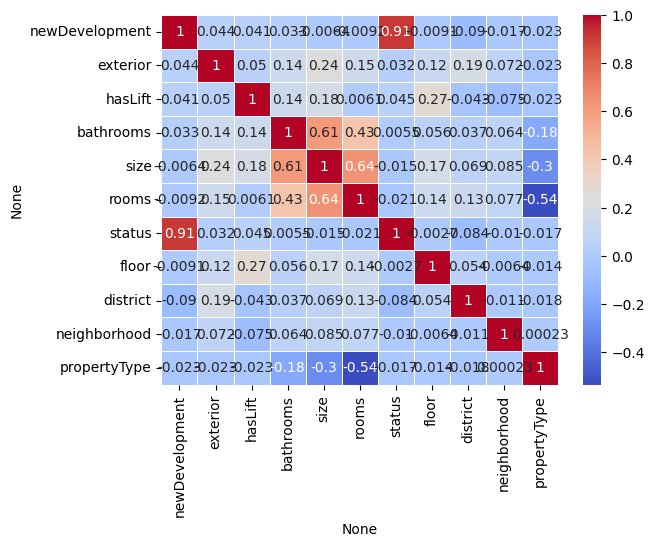

In [60]:
sns.heatmap(rents_X_transformed.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

<Axes: xlabel='None', ylabel='None'>

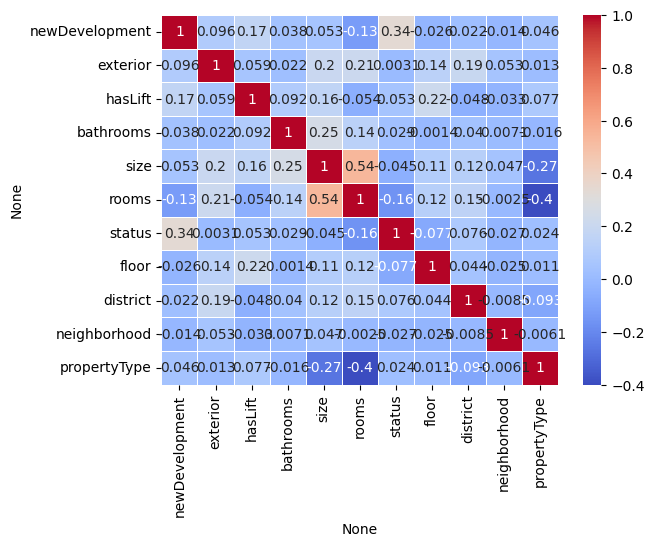

In [61]:
# Matriz de correlación
sns.heatmap(sales_X_transformed.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [62]:
rents_X_train, rents_X_test, rents_y_train, rents_y_test = train_test_split(rents_X, rents_y, test_size=0.2, random_state=42)
sales_X_train, sales_X_test, sales_y_train, sales_y_test = train_test_split(sales_X, sales_y, test_size=0.2, random_state=42)


In [63]:
# Create a bar plot for feature importances
def plot_feature_importance(importances, feature_names):
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], align="center")
    plt.yticks(range(len(indices)), feature_names[indices])
    plt.xlabel("Relative Importance")
    plt.show()

def print_mean_square_error(pipeline: Pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_preds = pipeline.predict(X_test)
    mse_sales = root_mean_squared_error(y_preds, y_test)
    print(f'Mean Squared Error: {mse_sales:.2f}')


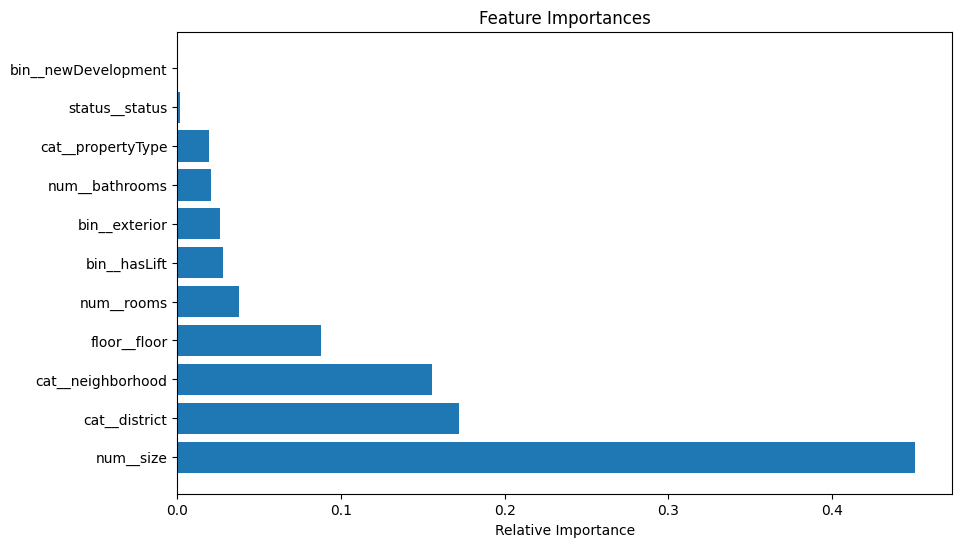

In [64]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())  # Using Random Forest as an example
])
model_pipeline.fit(rents_X_train, rents_y_train)

# Retrieve feature importances from the Random Forest regressor
importances = model_pipeline.named_steps['regressor'].feature_importances_ # Get feature importances

# Retrieve the feature names after preprocessing
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Plot feature importance for rents
plot_feature_importance(importances, feature_names)


In [65]:
print("Results for rents:")
print_mean_square_error(model_pipeline, rents_X_train, rents_y_train, rents_X_test, rents_y_test)

Results for rents:
Mean Squared Error: 222.73


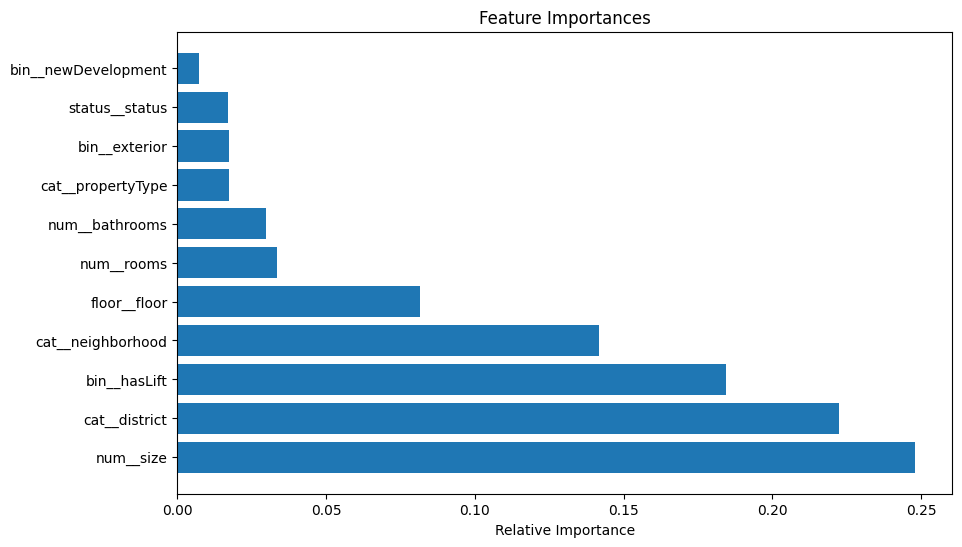

In [66]:
model_pipeline.fit(sales_X_train, sales_y_train)

# Retrieve feature importances from the Random Forest regressor
importances = model_pipeline.named_steps['regressor'].feature_importances_ # Get feature importances

# Retrieve the feature names after preprocessing
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Plot feature importance for rents
plot_feature_importance(importances, feature_names)

In [67]:
print("Results for sales:")
print_mean_square_error(model_pipeline, sales_X_train, sales_y_train, sales_X_test, sales_y_test)

Results for sales:
Mean Squared Error: 44851.82


In [68]:
# Define the preprocessing steps
non_ordinal_categorical = ['district', 'neighborhood', 'propertyType']
binary_features = ['newDevelopment', 'exterior', 'hasLift']
numerical_features = ['bathrooms', 'size', 'rooms']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('bin', 'passthrough', binary_features),  # Keep numerical features as they are
        ('num', 'passthrough', numerical_features),
        ('status', StatusValues(), ['status']),
        ('floor', MapFloorValues(), ['floor']),
        ('non_ordinal', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), non_ordinal_categorical)
    ]
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())  # Using Random Forest as an example
])

In [69]:
print("Results for rents:")
print_mean_square_error(model_pipeline, rents_X_train, rents_y_train, rents_X_test, rents_y_test)

Results for rents:
Mean Squared Error: 225.43


In [70]:
print("Results for sales:")
print_mean_square_error(model_pipeline, sales_X_train, sales_y_train, sales_X_test, sales_y_test)

Results for sales:


Mean Squared Error: 42590.44


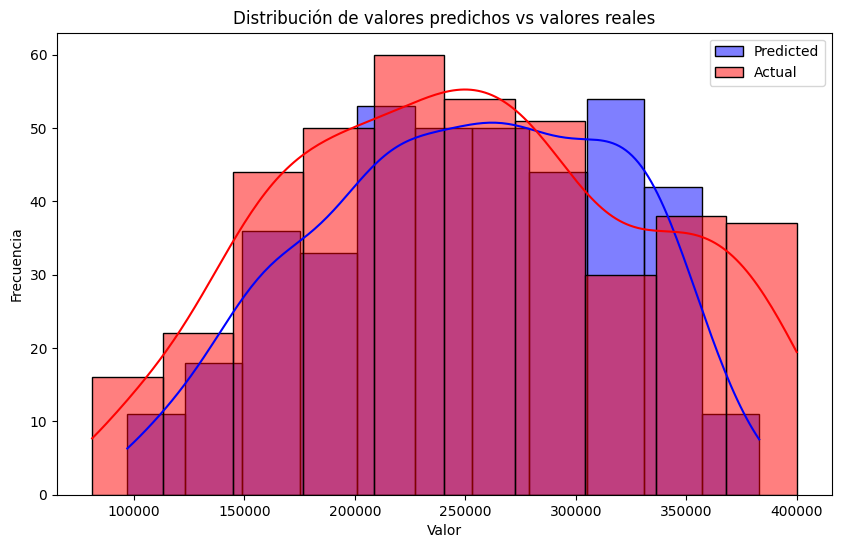

In [71]:
# Histograma de los valores predichos
model_pipeline.fit(sales_X_train, sales_y_train)
sales_y_preds = model_pipeline.predict(sales_X_test)
plt.figure(figsize=(10,6))
sns.histplot(sales_y_preds, kde=True, color='blue', label='Predicted')
sns.histplot(sales_y_test, kde=True, color='red', label='Actual')
plt.title('Distribución de valores predichos vs valores reales')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

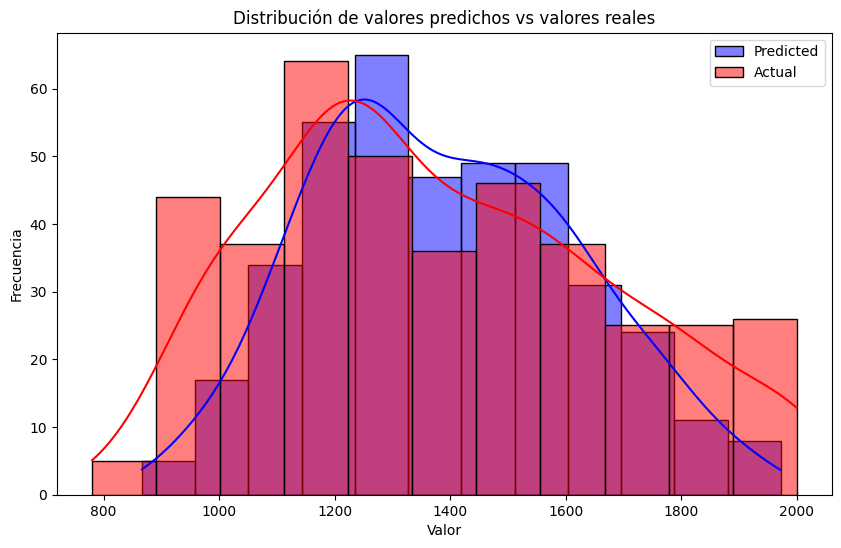

In [78]:
# Histograma de los valores predichos
model_pipeline.fit(rents_X_train, rents_y_train)
rents_y_preds = model_pipeline.predict(rents_X_test)
sales_preditected_rents = model_pipeline.predict(sales_X_test)
plt.figure(figsize=(10,6))
sns.histplot(rents_y_preds, kde=True, color='blue', label='Predicted')
sns.histplot(rents_y_test, kde=True, color='red', label='Actual')
plt.title('Distribución de valores predichos vs valores reales')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

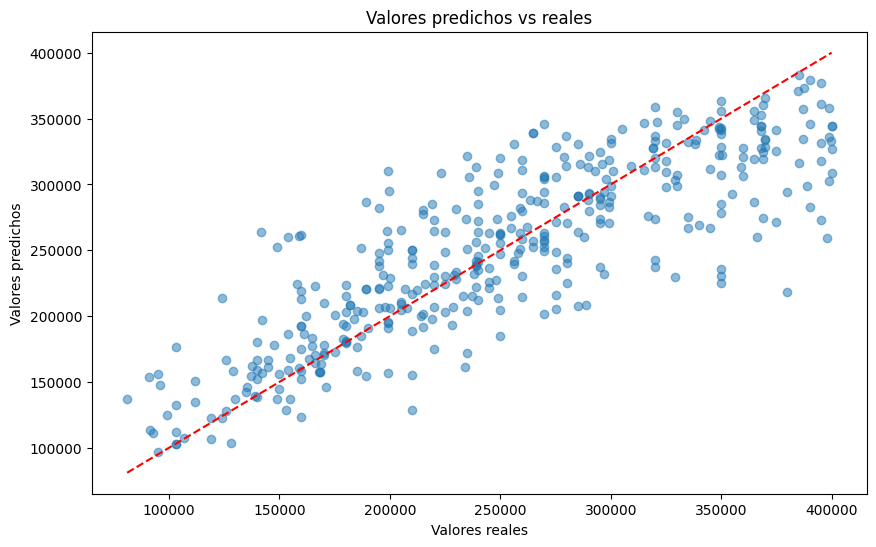

In [73]:
plt.figure(figsize=(10,6))
plt.scatter(sales_y_test, sales_y_preds, alpha=0.5)
plt.plot([min(sales_y_test), max(sales_y_test)], [min(sales_y_test), max(sales_y_test)], color='red', linestyle='--')
plt.title('Valores predichos vs reales')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()


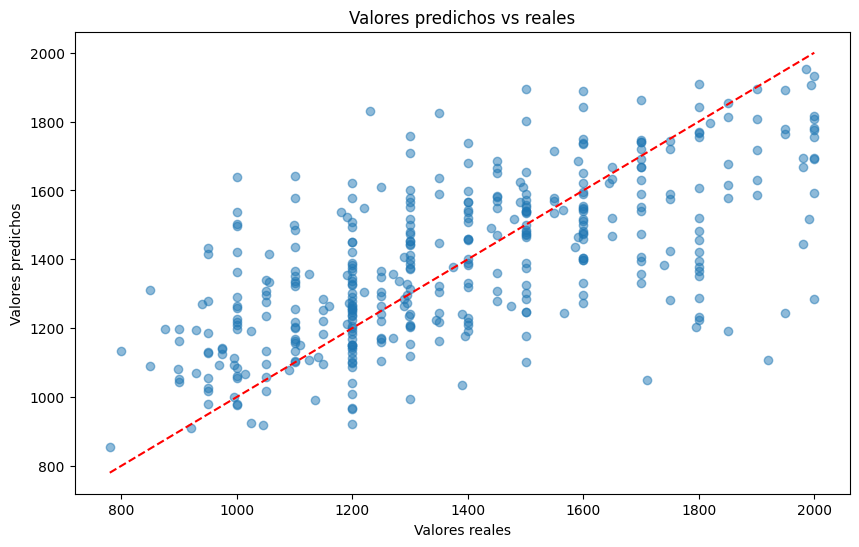

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(rents_y_test, rents_y_preds, alpha=0.5)
plt.plot([min(rents_y_test), max(rents_y_test)], [min(rents_y_test), max(rents_y_test)], color='red', linestyle='--')
plt.title('Valores predichos vs reales')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()


In [85]:
sales_y_test_series = pd.Series(sales_y_test, name='y', index=sales_X_test.index)
sales_y_preds_series = pd.Series(sales_y_preds, name='y_pred', index=sales_X_test.index)
sales_preditected_rents = pd.Series(sales_preditected_rents, name='rents_pred', index=sales_X_test.index)
sales_y_diff_series = sales_y_test_series - sales_y_preds_series
rents_predicted_per_real_value = sales_preditected_rents / sales_y_test_series
rents_predicted_per_stimated_value =  sales_preditected_rents / sales_y_preds_series
sales_test_pred = pd.concat([sales_X_test, sales_y_test_series, sales_y_preds_series, sales_y_diff_series.rename('y_diff'), sales_preditected_rents, rents_predicted_per_real_value.rename('rents_per_real'), rents_predicted_per_stimated_value.rename('rents_per_stimated')], axis=1)
sales_test_pred.to_csv('sales_y_pred.csv', index=False)

rents_y_test_series = pd.Series(rents_y_test, name='y', index=rents_X_test.index)
rents_y_preds_series = pd.Series(rents_y_preds, name='y_pred', index=rents_X_test.index)
rents_y_diff_series = rents_y_test_series - rents_y_preds_series
rents_test_pred = pd.concat([rents_X_test, rents_y_test_series, rents_y_preds_series, rents_y_diff_series.rename('y_diff')], axis=1)
rents_test_pred.to_csv('rents_y_pred.csv', index=False)

In [83]:
sales_test_pred

,address,bathrooms,country,distance,district,hasVideo,latitude,longitude,municipality,neighborhood,numPhotos,operation,propertyCode,province,rooms,priceByArea,detailedType,size,url,status,propertyType,suggestedTexts,showAddress,newDevelopment,hasPlan,has3DTour,has360,description,exterior,floor,hasLift,created,bare_tittle,isBassement,y,y_pred,y_diff,sales_pred
1607,calle de la Infanta Mercedes,1,es,5051,Tetuán,False,40.461880,-3.694188,Madrid,Cuzco-Castillejos,38,sale,106298252,Madrid,0,9167.0,"{'typology': 'flat', 'subTypology': 'studio'}",30.0,https://www.idealista.com/inmueble/106298252/,good,studio,"{'subtitle': 'Cuzco-Castillejos, Madrid', 'tit...",False,False,False,False,False,Solo wataspp a cualquier hora del día o de la ...,True,4,True,2024-10-18 12:44:15.803461,0,0,275000.0,235460.000000,39540.000000,1315.633333
530,plaza de Fonsagrada,1,es,6635,Fuencarral,False,40.476027,-3.708733,Madrid,Pilar,21,sale,106010719,Madrid,2,3636.0,{'typology': 'flat'},66.0,https://www.idealista.com/inmueble/106010719/,renew,flat,"{'subtitle': 'Pilar, Madrid', 'title': 'Piso e...",False,False,False,False,False,ESTUDIO HOME MADRID OFRECE piso de 66 m2 const...,True,1,True,2024-10-10 12:29:04.795725,0,0,240000.0,285149.000000,-45149.000000,1222.033333
397,calle Sierra del Valle,1,es,4521,Puente de Vallecas,False,40.389720,-3.660373,Madrid,Palomeras Bajas,10,sale,106089757,Madrid,2,2333.0,{'typology': 'flat'},60.0,https://www.idealista.com/inmueble/106089757/,good,flat,"{'subtitle': 'Palomeras Bajas, Madrid', 'title...",False,False,False,False,False,Redpiso portazgo te presenta una gran oportuni...,True,4,False,2024-10-10 12:29:03.304339,0,0,140000.0,152259.900000,-12259.900000,1007.650000
1417,barrio Sol,1,es,486,Centro,False,40.420994,-3.701360,Madrid,Sol,19,sale,106200234,Madrid,1,7359.0,{'typology': 'flat'},50.0,https://www.idealista.com/inmueble/106200234/,good,flat,"{'subtitle': 'Sol, Madrid', 'title': 'Piso'}",False,False,True,False,False,"MAGNÍFICO PISO JUNTO A LA GRAN VÍA DE MADRID, ...",False,4,True,2024-10-15 09:24:07.171972,0,0,367944.0,344719.630000,23224.370000,1428.703333
437,barrio Valdeacederas,1,es,5119,Tetuán,False,40.462709,-3.698278,Madrid,Valdeacederas,27,sale,106126374,Madrid,0,4255.0,"{'typology': 'flat', 'subTypology': 'studio'}",47.0,https://www.idealista.com/inmueble/106126374/,good,studio,"{'subtitle': 'Valdeacederas, Madrid', 'title':...",False,False,False,True,False,¡Gran oportunidad de inversión en Madrid! Pone...,True,bj,False,2024-10-10 12:29:03.308187,0,1,200000.0,206505.000000,-6505.000000,1062.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,calle de Santa Marta,1,es,3466,Puente de Vallecas,False,40.402912,-3.663623,Madrid,Numancia,33,sale,105969635,Madrid,3,2695.0,{'typology': 'flat'},59.0,https://www.idealista.com/inmueble/105969635/,good,flat,"{'subtitle': 'Numancia, Madrid', 'title': 'Pis...",False,False,False,False,False,Agencia inmobiliaria de MADRID - SMILE HOUSE V...,True,en,False,2024-10-10 12:29:09.171513,0,1,159000.0,160486.400000,-1486.400000,1111.450000
741,calle de la Cal,1,es,3875,Usera,False,40.382115,-3.694602,Madrid,12 de Octubre-Orcasur,29,sale,105975560,Madrid,1,4070.0,"{'typology': 'flat', 'subTypology': 'penthouse'}",86.0,https://www.idealista.com/inmueble/105975560/,good,penthouse,"{'subtitle': '12 de Octubre-Orcasur, Madrid', ...",False,False,False,False,False,"Bonito ático muy luminoso, con terraza de 27 m...",True,3,True,2024-10-10 12:29:06.732518,0,0,350000.0,285180.523333,64819.476667,1437.690000
1589,calle de Bravo Murillo,1,es,4500,Tetuán,True,40.457117,-3.703021,Madrid,Berruguete,29,sale,106299292,Madrid,2,4902.0,{'typology': 'flat'},51.0,https://www.idealista.com/inmueble/106299292/,good,flat,"{'subtitle': 'Berruguete, Madrid', 'title': 'P...",False,False,False,False,False,"***GRAN OPORTUNIDAD PARA INVERSORES, SOLO PAGO...",True,3,True,2024-10-18 12:44:15.8018